# INTRODUCTION


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from biplot import biplot

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Index(['frequency listening of emerging artist', 'tempo',
       'frequency during working', 'frequency during exercising',
       'frequency during cooking', 'frequency during driving',
       'frequency for passing the time', 'age', 'monthly listening frequency',
       'daily listening frequency'],
      dtype='object')
(221, 10)
  Dimension  Valeur Propre  % valeur propre  % cum. val. prop.
0      Dim1       2.714580             27.0               27.0
1      Dim2       1.887135             19.0               46.0
2      Dim3       1.059130             11.0               57.0
3      Dim4       1.001039             10.0               67.0
4      Dim5       0.871717              9.0               75.0


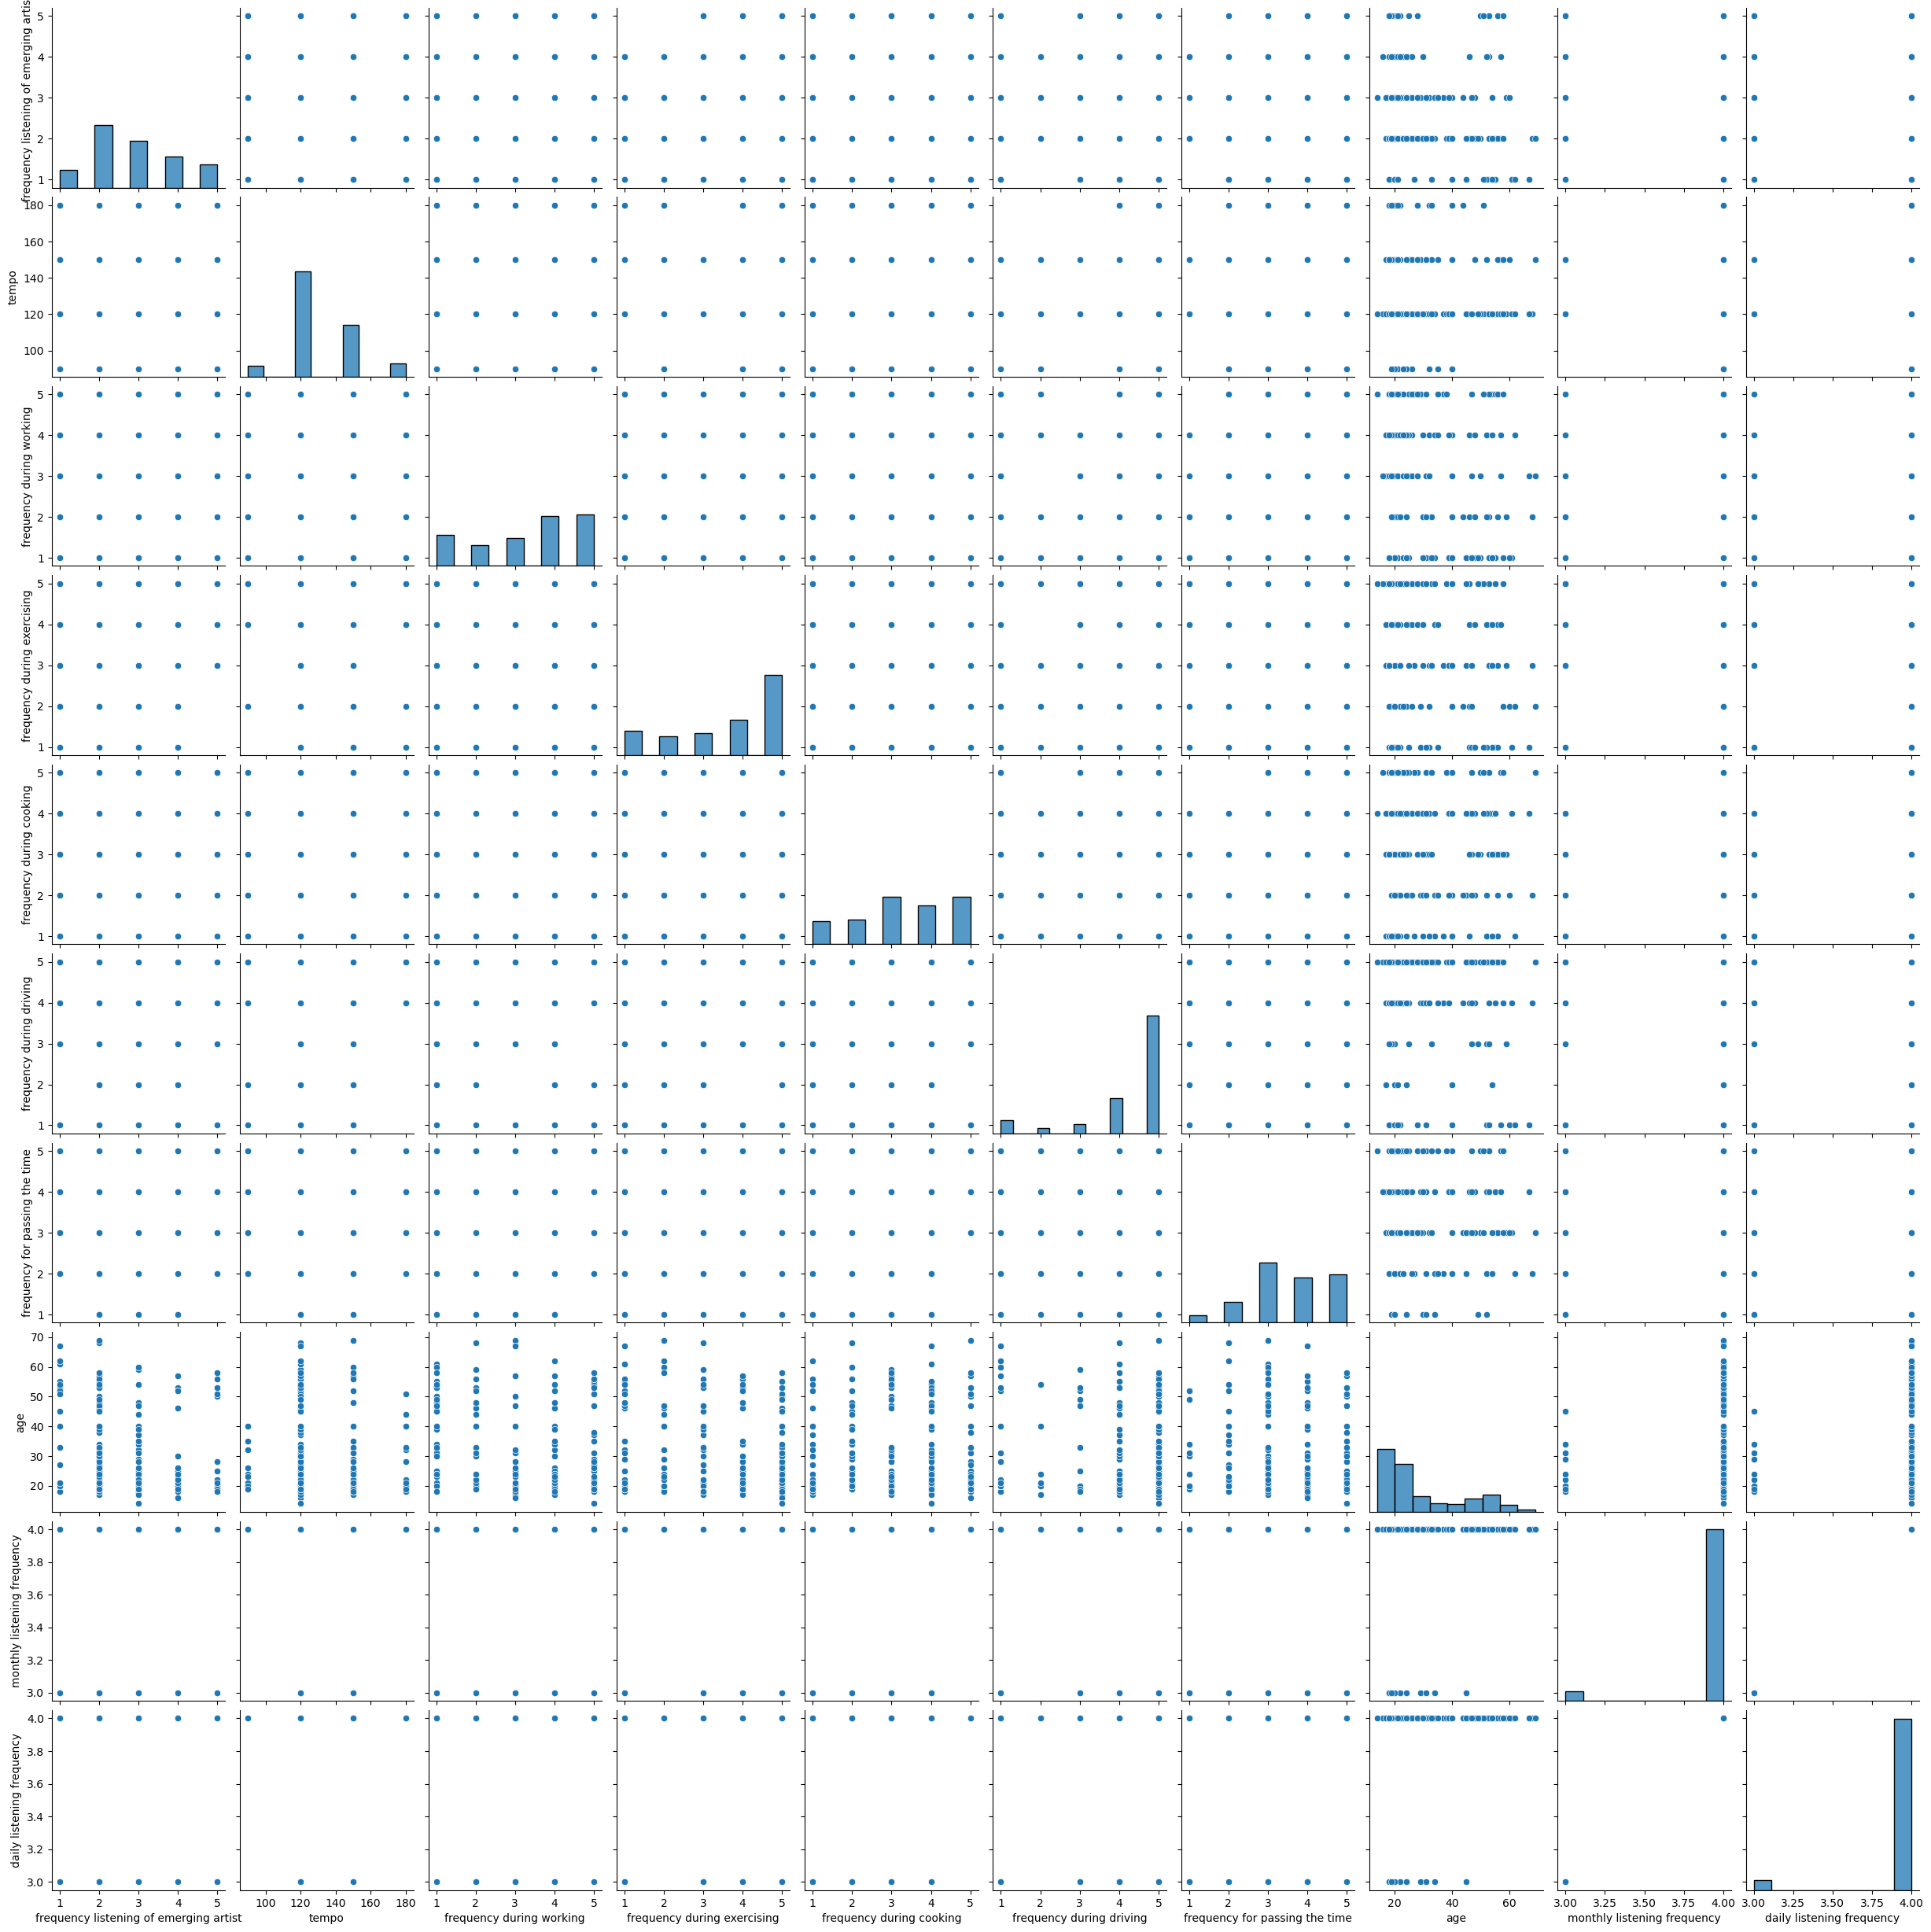

In [14]:
data = pd.read_csv('cleaned_data.csv')
data_quant = data[["frequency listening of emerging artist", "tempo", "frequency during working", "frequency during exercising", "frequency during cooking", "frequency during driving", "frequency for passing the time", "age", "monthly listening frequency", "daily listening frequency"]].dropna()
# new_cols = []

n_compo = 5
print(data_quant.columns)
### Visualisation des données
sns.pairplot(data_quant)

temp = data_quant.sub(data_quant.mean())
x_scaled = temp.div(data_quant.std())
print (x_scaled.shape)

pca = PCA(n_components=n_compo)
pca_res = pca.fit_transform(x_scaled)
# print(pca_res)

eig = pd.DataFrame({
    "Dimension" :
        ["Dim" + str(x + 1) for x in range(n_compo)],
    "Valeur Propre" : pca.explained_variance_,
    "% valeur propre" : 
        np.round(pca.explained_variance_ratio_*100),
    "% cum. val. prop." : 
        np.round(np.cumsum(pca.explained_variance_ratio_)*100)
})
print(eig)



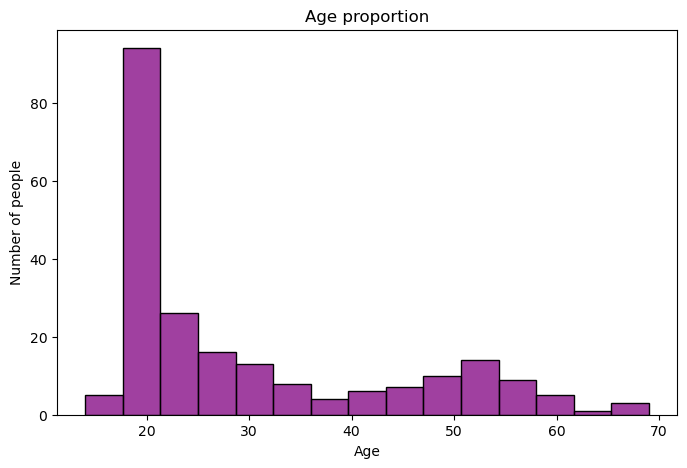

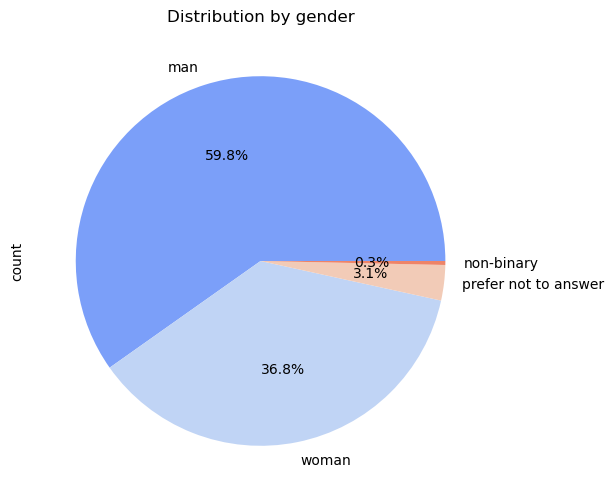

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data_quant['age'], bins=15, kde=False, color='purple')
plt.title("Age proportion")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

plt.figure(figsize=(6, 6))
data['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(data['gender'].unique())))
plt.title("Distribution by gender")
plt.show()


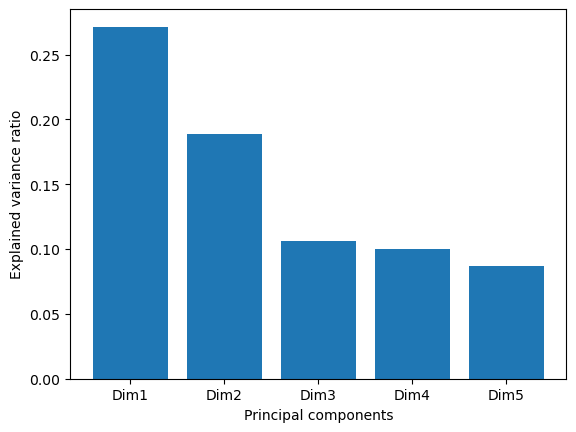

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Nombre anormal de catégories !


d:\myli\biplot.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_c,y_c, c = cat.cat.codes,cmap=cmap)


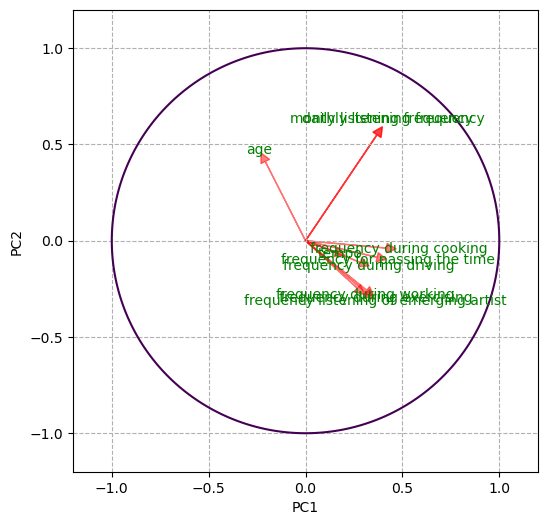

In [16]:
y1 = list(pca.explained_variance_ratio_)
x1 = range(len(y1))
plt.bar(x1, y1)
plt.xticks(list(x1), [f"Dim{i+1}" for i in x1])
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")
plt.show()

biplot(score=pca_res[:, 0:2],
       coeff=np.transpose(pca.components_[0:2, :]),
       cat=data['gender'].iloc[:0],
       coeff_labels=list(data_quant.columns),
       density=False)
plt.show()

## Graphique des individus

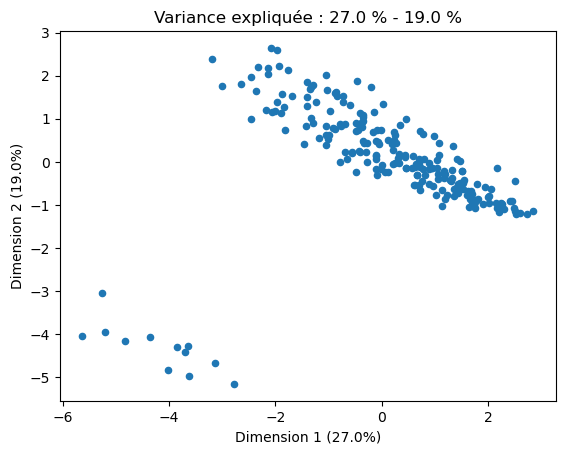

In [17]:
pcadf = pd.DataFrame ({
    "Dim1" : pca_res [: , 0 ] ,
    "Dim2" : pca_res [: , 1 ] ,
    "gender" : data ["gender"] [: len (pca_res) ]
})
listVariance = np.round(pca.explained_variance_ratio_*100)
pcadf.plot.scatter ("Dim1", "Dim2")
plt.title (f"Variance expliquée : {listVariance[0]} % - {listVariance[1]} %")
plt.xlabel (f"Dimension 1 ({listVariance[0]}%)")
plt.ylabel (f"Dimension 2 ({listVariance[1]}%)")
plt.show()


              genre  count
0               pop    157
1              rock    138
2               rap    108
3           electro     85
4              jazz     44
5   classical music     36
6    no preferences     30
7            techno     14
8             metal     14
9              folk      6
10   french variety      5
11             funk      3
12         eclectic      2
13              ost      2


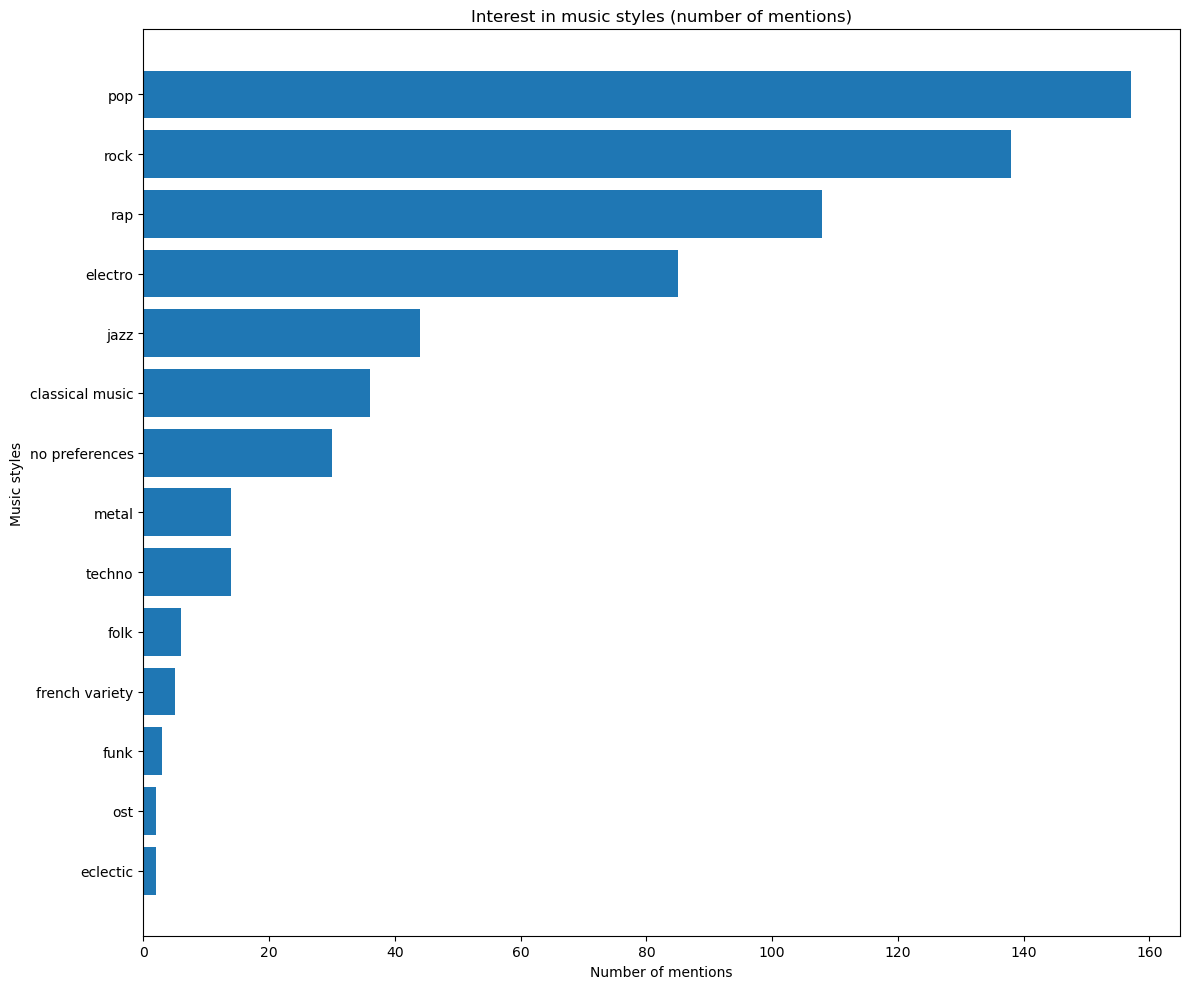

In [18]:
df = pd.read_csv("cleaned_data.csv")  # <<< CORRIGÉ ICI AUSSI

# Découpage + explosion des genres
df_genres = df.copy()
df_genres['genre_list'] = df_genres['music style'].str.split(';')

exploded = df_genres.explode('genre_list')

# Comptage
genre_counts = exploded['genre_list'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
print(genre_counts)

sorted_counts = genre_counts.sort_values('count')

plt.figure(figsize=(12, 10))
plt.barh(sorted_counts['genre'], sorted_counts['count'])
plt.xlabel('Number of mentions')
plt.ylabel('Music styles')
plt.title("Interest in music styles (number of mentions)")
plt.tight_layout()
plt.show()